In [1]:
# Import pandas,numpy
import pandas as pd
import numpy as np

In [2]:
# Import Visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
#sns.set_context('poster',font_scale=0.8)
pd.options.display.float_format = '{:.2f}'.format

In [10]:
# Read CSV's
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [11]:
#Combination of 2 csv's
combine = [train_df, test_df]

                                   ### Βασικές Πληροφορίες Dataset ###
 Στο Dataset αυτό, έχουμε 891 καταχωρήσεις επιβατών του Τιτανικού. Ανάμεσα στα στοιχεία βρίσκουμε Ονόματα, Φύλο, Ηλικία, σημείο επιβίβασης κ.α. 
Στην λίστα αυτή επίσης, βλέπουμε και το ποιοι από αυτούς τους επιβάτες, κατάφεραν να επιβιώσουν του ναυαγίου.

In [4]:
print(list(train_df))
print('-'*100)
print('Ο συνολικός αριθμός των στηλών είναι: ',len(list(train_df))) # Ο αριθμός των στηλών

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
----------------------------------------------------------------------------------------------------
Ο συνολικός αριθμός των στηλών είναι:  12


In [7]:
print(train_df.info()) # Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [13]:
print(train_df.describe()) # Extra Info

       PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
count       891.00    891.00  891.00 714.00 891.00 891.00 891.00
mean        446.00      0.38    2.31  29.70   0.52   0.38  32.20
std         257.35      0.49    0.84  14.53   1.10   0.81  49.69
min           1.00      0.00    1.00   0.42   0.00   0.00   0.00
25%         223.50      0.00    2.00  20.12   0.00   0.00   7.91
50%         446.00      0.00    3.00  28.00   0.00   0.00  14.45
75%         668.50      1.00    3.00  38.00   1.00   0.00  31.00
max         891.00      1.00    3.00  80.00   8.00   6.00 512.33


In [6]:
train_df.head() # Εμφάνιση των πρώτων 5 γραμμών του Dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


                                ΘΑ ΦΤΙΑΞΟΥΜΕ ΝΕΑ ΣΤΗΛΗ ΜΕ ΔΙΑΧΩΡΙΣΜΟ MALE/FEMALE & CHILD
                                 ΕΤΣΙ ΩΣΤΕ ΝΑ ΞΕΧΩΡΙΣΟΥΜΕ ΤΑ ΠΑΙΔΙΑ ΠΟΥ ΗΤΑΝ ΣΤΟ ΠΛΟΙΟ
                                 
                                ΑΠΟ ΤΗ ΣΤΙΓΜΗ ΠΟΥ ΥΠΑΡΧΕΙ Η ΝΕΑ ΣΤΗΛΗ PERSON ΔΕΝ ΧΡΕΙΑΖΟΜΑΣΤΕ
                                                ΠΛΕΟΝ ΤΗΝ ΣΤΗΛΗ SEX

In [14]:
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

In [15]:
for dataset in combine:
    dataset['Person'] = dataset[['Age','Sex']].apply(get_person,axis=1)
    dataset.drop(['Sex'], axis=1, inplace=True)

                            ##### ΑΠΛΑ ΕΛΕΓΧΟΣ ΕΑΝ ΕΓΙΕΝ ΣΩΣΤΑ ΚΑΙ ΣΤΑ ΔΥΟ #####

In [19]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",22.00,1,0,A/5 21171,7.25,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00,1,0,PC 17599,71.28,C85,C,female


In [18]:
test_df.head(2)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,892,3,"Kelly, Mr. James",34.50,0,0,330911,7.83,NaN,Q,male
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.00,1,0,363272,7.00,NaN,S,female


                                 ΜΙΑ ΓΡΗΓΟΡΗ ΜΑΤΙΑ ΣΤA ΣΤΑΤΙΣΤΙΚΑ
                                       ΑΡΙΘΜΟΙ-ΔΙΑΓΡΑΜΜΑΤΑ

In [21]:
print('Ο συνολικός αριθμός των επιβατών είναι:',len(list(train_df['PassengerId'])))

Ο συνολικός αριθμός των επιβατών είναι: 891


In [22]:
print('O μέσος όρος ηλικίας των επιβατών είναι:', train_df['Age'].mean())

O μέσος όρος ηλικίας των επιβατών είναι: 29.69911764705882


In [26]:
print('O μέσος όρος εισιτηρίου ήταν:', train_df['Fare'].mean())

O μέσος όρος εισιτηρίου ήταν: 32.2042079685746


                                ######## ΕΠΙΒΑΤΕΣ ΠΟΥ ΣΩΘΗΚΑΝ #######

In [24]:
print(train_df.groupby(['Survived']).size())

Survived
0    549
1    342
dtype: int64


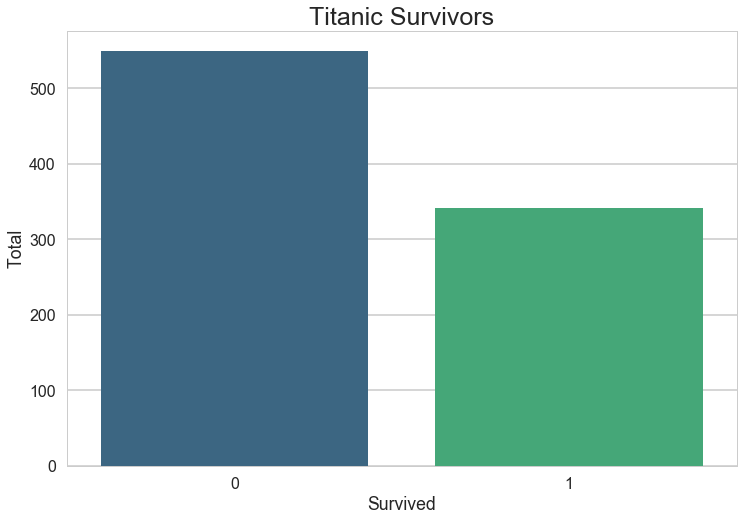

In [25]:
plt.figure(figsize=(12,8))
sns.set_context('poster')
ax = sns.countplot(x='Survived',data=train_df,palette='viridis')
ax.axes.set_title("Titanic Survivors",fontsize=25)
ax.set_xlabel("Survived")
ax.set_ylabel("Total")

                                ######## ΕΠΙΒΑΤΕΣ ΑΝΑ ΚΛΑΣΗ ########

In [27]:
print(train_df.groupby(['Pclass']).size())

Pclass
1    216
2    184
3    491
dtype: int64


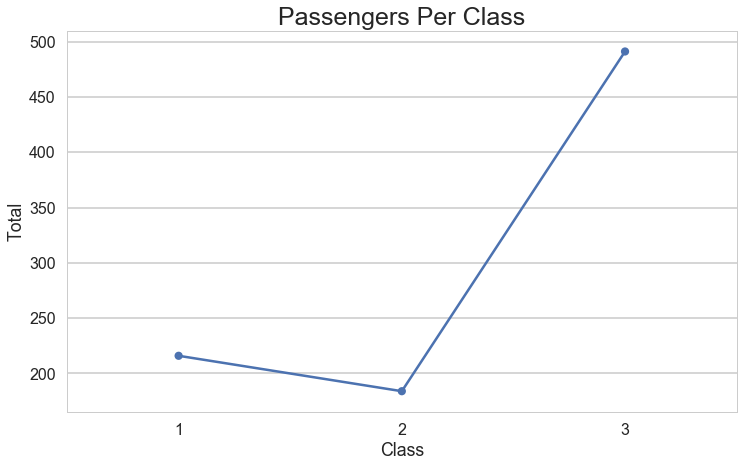

In [28]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.set_context('poster')
ax = sns.pointplot(x=sorted(train_df.Pclass.unique()), y = train_df.groupby(['Pclass']).size(),
              scale=0.5)
ax.axes.set_title("Passengers Per Class",fontsize=25)
ax.set_xlabel("Class")
ax.set_ylabel("Total")

                                ######## ΕΠΙΒΑΤΕΣ ΑΝΑ ΦΥΛΛΟ ########

In [29]:
print(train_df.groupby(['Person']).size())

Person
child      83
female    271
male      537
dtype: int64


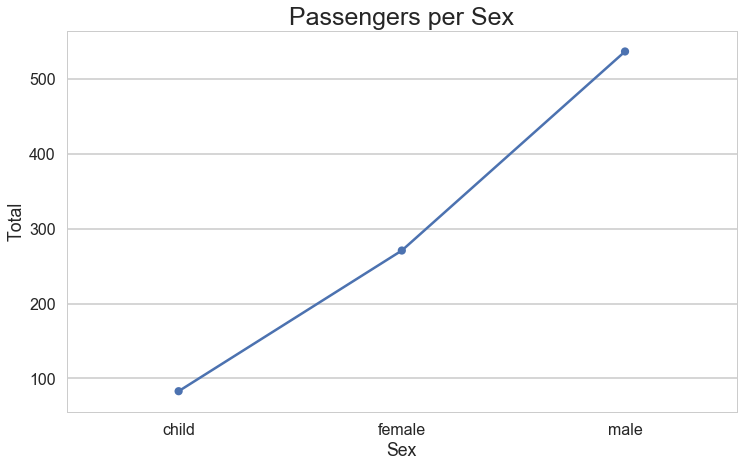

In [30]:
plt.figure(figsize=(12,7))
sns.set_context('poster')
ax = sns.pointplot(x=sorted(train_df.Person.unique()), y = train_df.groupby(['Person']).size(),
              scale=0.5)
ax.axes.set_title("Passengers per Sex",fontsize=25)
ax.set_xlabel("Sex")
ax.set_ylabel("Total")
#plt.savefig('PerSex.png')

                                ######### ΕΠΙΒΑΤΕΣ ΑΝΑ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ ######

In [31]:
print(train_df.groupby(['Embarked']).size())

Embarked
C    168
Q     77
S    644
dtype: int64


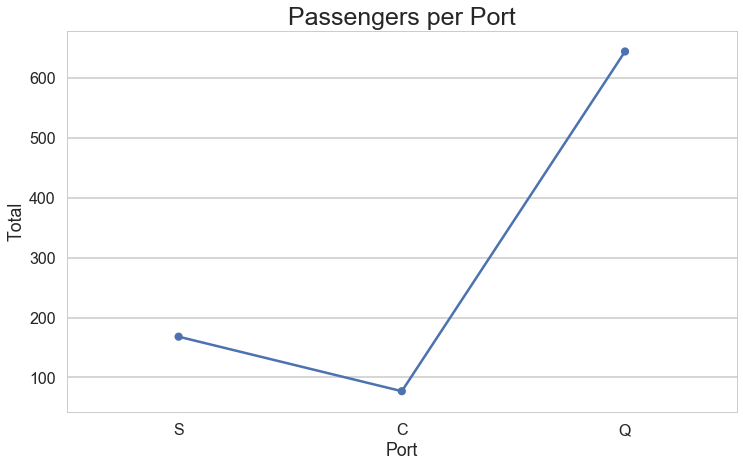

In [32]:
x = train_df.Embarked.unique()
x = x[~pd.isnull(x)]

plt.figure(figsize=(12,7))
sns.set_context('poster')
ax = sns.pointplot (x, y = train_df.groupby(['Embarked']).size(),scale=0.5)
ax.axes.set_title("Passengers per Port",fontsize=25)
ax.set_xlabel("Port")
ax.set_ylabel("Total")

                                  ####### ΕΠΙΒΑΤΕΣ ΑΝΑ ΗΛΙΚΙΑ #########

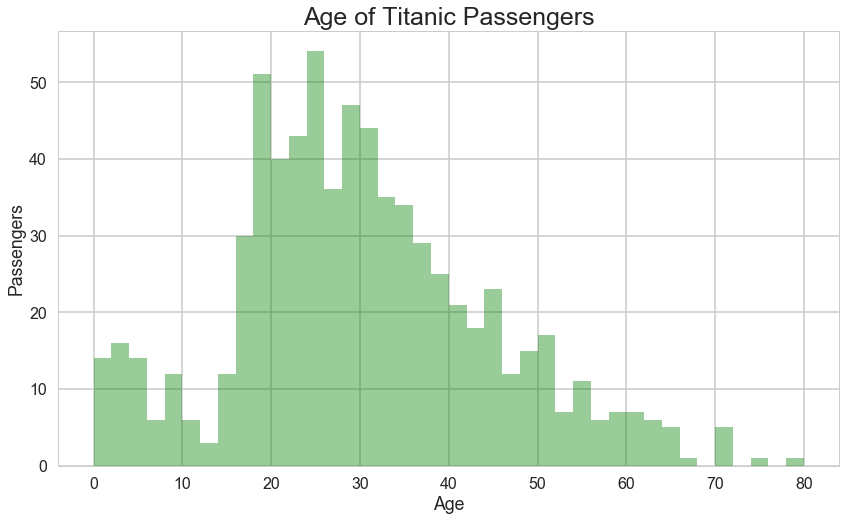

In [33]:
#train_df['Age'].hist(bins=40,color='darkred',alpha=0.7)
x = train_df['Age'].dropna()

bins = np.arange(0, 82, 2)
plt.figure(figsize=(14,8))
sns.set_context('poster')
ax = sns.distplot(x, kde=False, bins = bins, color = 'g')
ax.axes.set_title("Age of Titanic Passengers",fontsize=25)
ax.set_xlabel("Age")
ax.set_ylabel("Passengers")

#plt.savefig('Age.png')

                                ###### ΚΟΣΤΟΣ ΕΙΣΙΤΗΡΙΟΥ ΑΝΑ ΚΛΑΣΗ ######

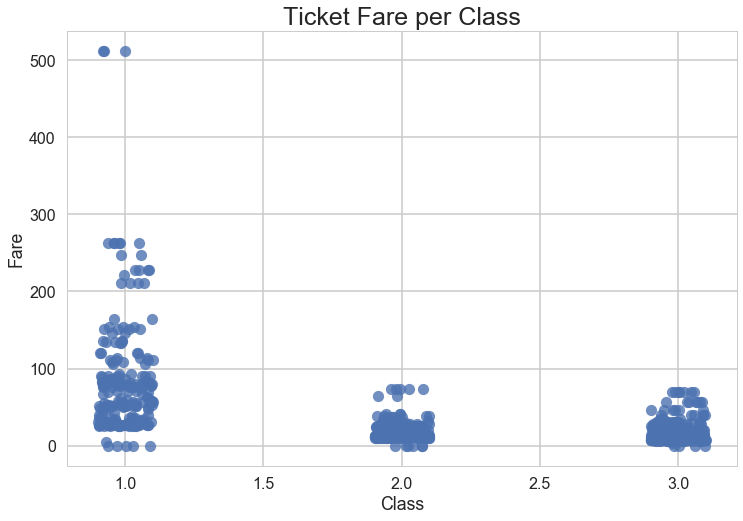

In [35]:
plt.figure(figsize=(12,8))
sns.set_context('poster')
ax = sns.regplot(x="Pclass", y="Fare", data=train_df, x_jitter=.1, fit_reg=False)
ax.axes.set_title("Ticket Fare per Class",fontsize=25)
ax.set_xlabel("Class")
ax.set_ylabel("Fare")

                                        ##### ΗΛΙΚΙΑ ΑΝΑ ΚΛΑΣΗ ######

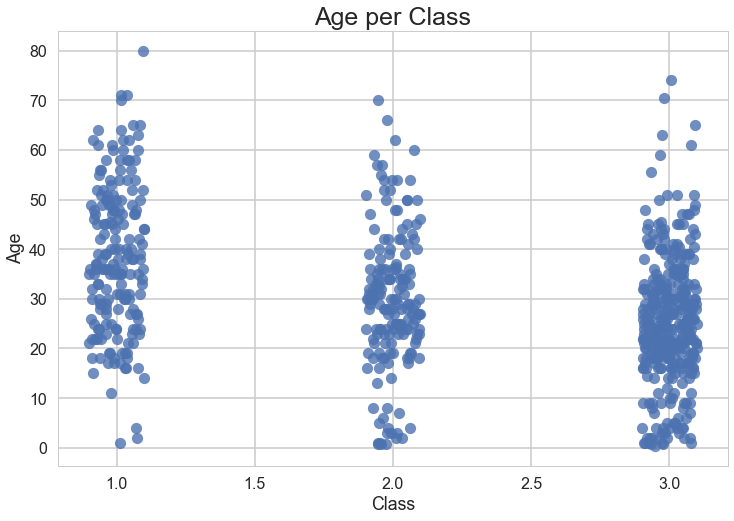

In [36]:
plt.figure(figsize=(12,8))
sns.set_context('poster')
ax = sns.regplot(x="Pclass", y="Age", data=train_df, x_jitter=0.1, fit_reg=False)
ax.axes.set_title("Age per Class",fontsize=25)
ax.set_xlabel("Class")
ax.set_ylabel("Age")

                                   ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΣΤΑΤΙΣΤΙΚΑ ΣΤΟΙΧΕΙΑ
                                            ΚΑΙ ΔΙΑΓΡΑΜΜΑΤΑ

                            ####### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΑΝΑ ΚΛΑΣΗ ########

In [37]:
print (train_df[['Pclass', 'Survived']].groupby(['Pclass'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
a = train_df[["Pclass", "Survived"]].groupby(['Pclass'], 
                as_index=False).sum().sort_values(by='Survived', ascending=False)
a['Percentage']= a['Survived']/a['Survived'].sum()
print(a)

   Pclass  Survived
0       1      0.63
1       2      0.47
2       3      0.24
----------------------------------------------------------------------------------------------------
   Pclass  Survived  Percentage
0       1       136        0.40
2       3       119        0.35
1       2        87        0.25


                         ΤΟ 62% ΤΩΝ ΕΠΙΒΑΤΩΝ ΤΗΣ ΠΡΩΤΗΣ ΚΛΑΣΗΣ ΕΠΙΒΙΩΣΕ
                         ΤΟ 47% ΤΩΝ ΕΠΙΒΑΤΩΝ ΤΗΣ ΔΕΥΤΕΡΗΣ ΚΛΑΣΗΣ ΕΠΙΒΙΩΣΕ
                         ΤΟ 24% ΤΩΝ ΕΠΙΒΑΤΩΝ ΤΗΣ ΤΡΙΤΗΣ ΚΛΑΣΗΣ ΕΠΙΒΙΩΣΕ

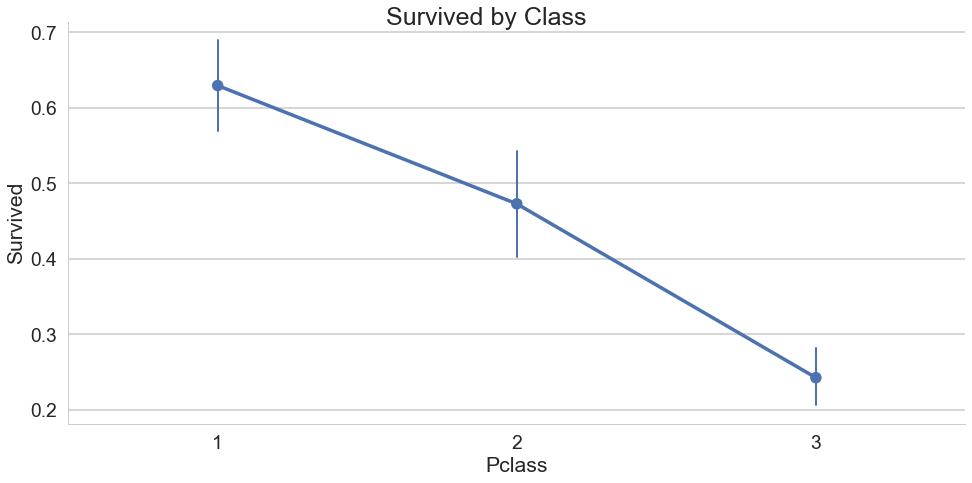

In [38]:
plt.figure(figsize=(11,7))
sns.set_context('poster',font_scale=1.2)
ax = sns.factorplot('Pclass','Survived', data=train_df,size=7,aspect=2, 
               errwidth = 2, scale = 0.7)
plt.subplots_adjust(top=0.95)
ax.fig.suptitle('Survived by Class',fontsize=25)

                            ######### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΑΝΑ ΦΥΛΛΟ ########

                                ΤΟ 75% ΤΩΝ ΓΥΝΑΙΚΩΝ ΕΠΙΒΙΩΣΕ
                                ΤΟ 59% ΤΩΝ ΠΑΙΔΙΩΝ ΕΠΙΒΙΩΣΕ
                                ΤΟ 16% ΤΩΝ ΑΝΤΡΩΝ ΕΠΙΒΙΩΣΕ

In [39]:
print (train_df[['Person', 'Survived']].groupby(['Person'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
b = train_df[["Person", "Survived"]].groupby(['Person'], 
                as_index=False).sum().sort_values(by='Survived', ascending=False)
b['Percentage']= b['Survived']/b['Survived'].sum()
print(b)

   Person  Survived
1  female      0.76
0   child      0.59
2    male      0.16
----------------------------------------------------------------------------------------------------
   Person  Survived  Percentage
1  female       205        0.60
2    male        88        0.26
0   child        49        0.14


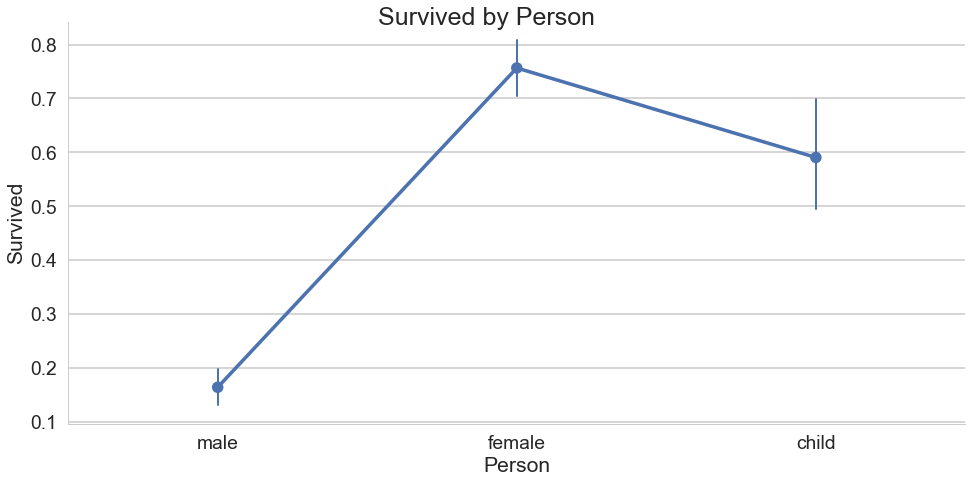

In [40]:
plt.figure(figsize=(11,7))
sns.set_context('poster',font_scale=1.2)
ax = sns.factorplot('Person','Survived', data=train_df,size=7,aspect=2, 
               errwidth = 2, scale = 0.7)
plt.subplots_adjust(top=0.95)
ax.fig.suptitle('Survived by Person',fontsize=25)
#ax.set_xticklabels("")

                        ###### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΑΝΑ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ #######

In [41]:
print (train_df[['Embarked', 'Survived']].groupby(['Embarked'], 
                as_index=False).mean().sort_values(by='Survived', ascending=False))
print('-'*100)
c = train_df[["Embarked", "Survived"]].groupby(['Embarked'], 
                as_index=False).sum().sort_values(by='Survived', ascending=False)
c['Percentage']= c['Survived']/c['Survived'].sum()
print(c)

  Embarked  Survived
0        C      0.55
1        Q      0.39
2        S      0.34
----------------------------------------------------------------------------------------------------
  Embarked  Survived  Percentage
2        S       217        0.64
0        C        93        0.27
1        Q        30        0.09


                            ΤΟ 65% ΟΣΩΝ ΕΠΙΒΙΒΑΣΘΗΚΑΝ ΣΤΟ C ΕΠΙΒΙΩΣΕ
                            ΤΟ 38% ΟΣΩΝ ΕΠΙΒΙΒΑΣΘΗΚΑΝ ΣΤΟ Q ΕΠΙΒΙΩΣΕ
                            ΤΟ 33% ΟΣΩΝ ΕΠΙΒΙΒΑΣΘΗΚΑΝ ΣΤΟ SOUTHAMPTON ΕΠΙΒΙΩΣΕ

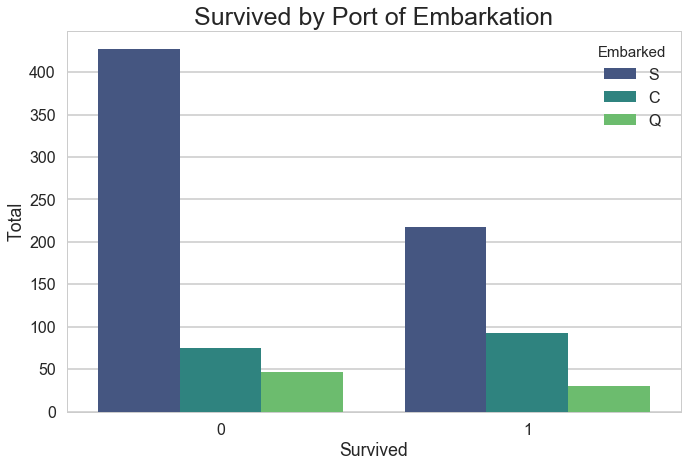

In [44]:
labels = {"A","B"}
plt.figure(figsize=(11,7))
sns.set_context('poster')
ax = sns.countplot(x='Survived',hue='Embarked',data=train_df,palette='viridis')
ax.axes.set_title("Survived by Port of Embarkation",fontsize=25)
ax.set_xlabel("Survived")
ax.set_ylabel("Total")
#ax.set_xticklabels(labels, fontsize=15)

                        ##### ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΜΕ ΒΑΣΗ ΤΗΝ ΗΛΙΚΙΑ ##########

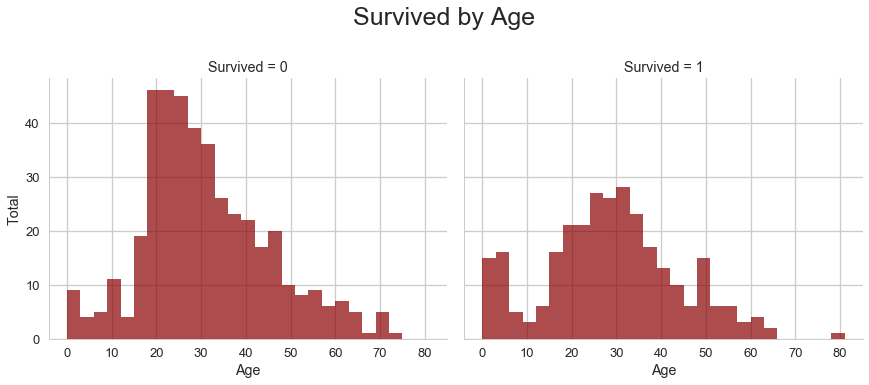

In [45]:
bins = np.arange(0, 82, 3)
sns.set_context('talk')
g = sns.FacetGrid(train_df, col="Survived", size=5.5, aspect=1.1)
g = g.map(plt.hist, "Age", color="darkred", alpha=0.7, bins=bins)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survived by Age',fontsize=25)
g.axes[0,0].set_ylabel('Total')
#plt.savefig('Age2.png')

                     ######## ΕΠΙΒΙΩΣΗ ΕΠΙΒΑΤΩΝ ΜΕ ΒΑΣΗ ΤΗΝ ΤΙΜΗ ΤΟΥ ΕΙΣΙΤΗΡΙΟΥ #######

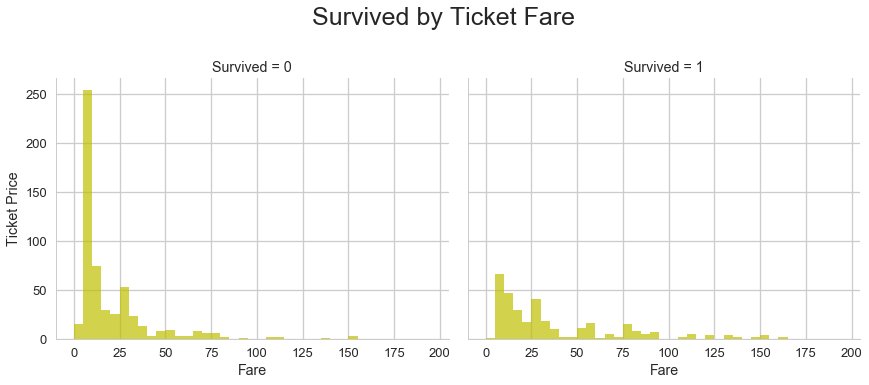

In [46]:
bins = np.arange(0, 200,5)
sns.set_context('talk')
g = sns.FacetGrid(train_df, col="Survived", size=5.5, aspect=1.1)
g = g.map(plt.hist, "Fare", color="y", alpha=0.7, bins=bins)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survived by Ticket Fare',fontsize=25)
g.axes[0,0].set_ylabel('Ticket Price')
#plt.savefig('Age2.png')

                ######## ΕΛΕΓΧΟΣ ΕΠΙΒΙΩΣΗΣ ΜΕ ΒΑΣΗ ΤΟ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ ΚΑΙ ΤΟ ΦΥΛΟ #######

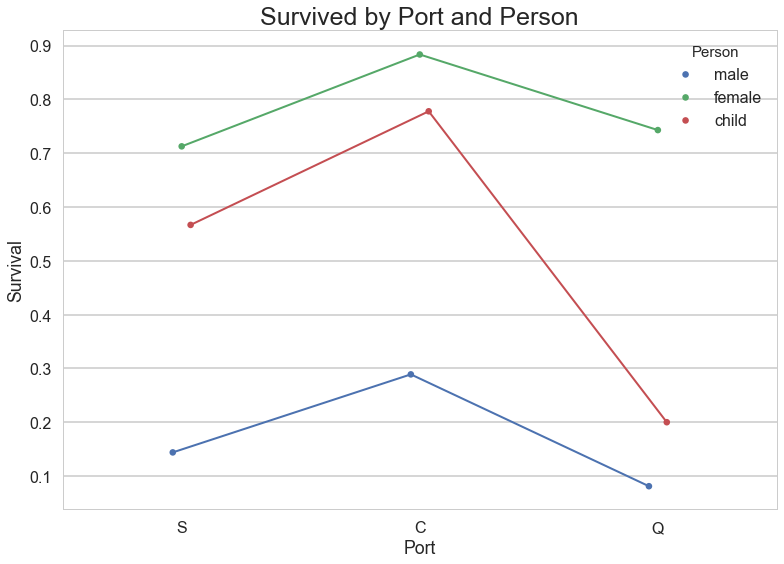

In [47]:
sns.set_context('poster')
ax = sns.pointplot(x="Embarked", y="Survived", hue='Person',
                   data=train_df, dodge=True,size=1, scale = 0.4, join=True, ci=None)
ax.axes.set_title("Survived by Port and Person",fontsize=25)
ax.set_xlabel("Port")
ax.set_ylabel("Survival")

                ######## ΕΛΕΓΧΟΣ ΕΠΙΒΙΩΣΗΣ ΜΕ ΒΑΣΗ ΤΟ ΛΙΜΑΝΙ ΕΠΙΒΙΒΑΣΗΣ ΚΑΙ ΤΗΝ ΚΛΑΣΗ #######

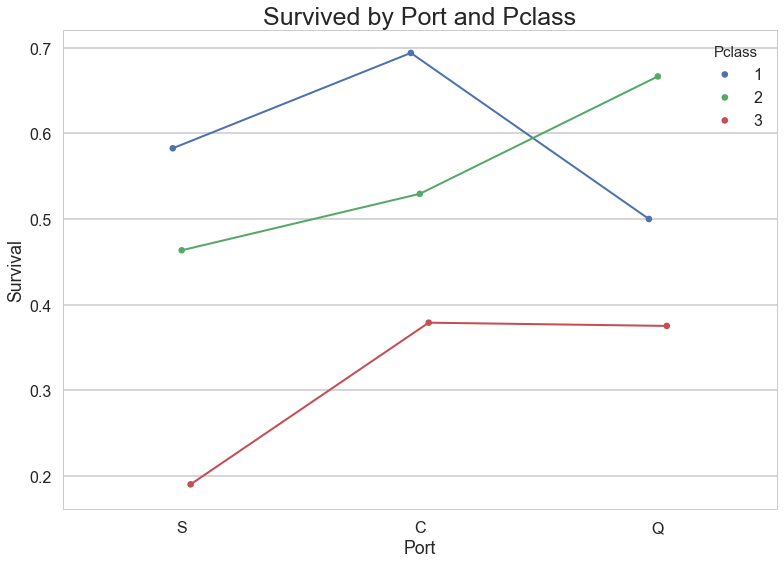

In [48]:
sns.set_context('poster')
ax = sns.pointplot(x="Embarked", y="Survived", hue='Pclass',
                   data=train_df, dodge=True, scale = 0.4, join=True, ci=None)
ax.axes.set_title("Survived by Port and Pclass",fontsize=25)
ax.set_xlabel("Port")
ax.set_ylabel("Survival")

                ######## ΕΛΕΓΧΟΣ ΕΠΙΒΙΩΣΗΣ ΜΕ ΒΑΣΗ ΤΗΝ ΚΛΑΣΣΗ ΚΑΙ ΤΗΝ ΗΛΙΚΙΑ #######

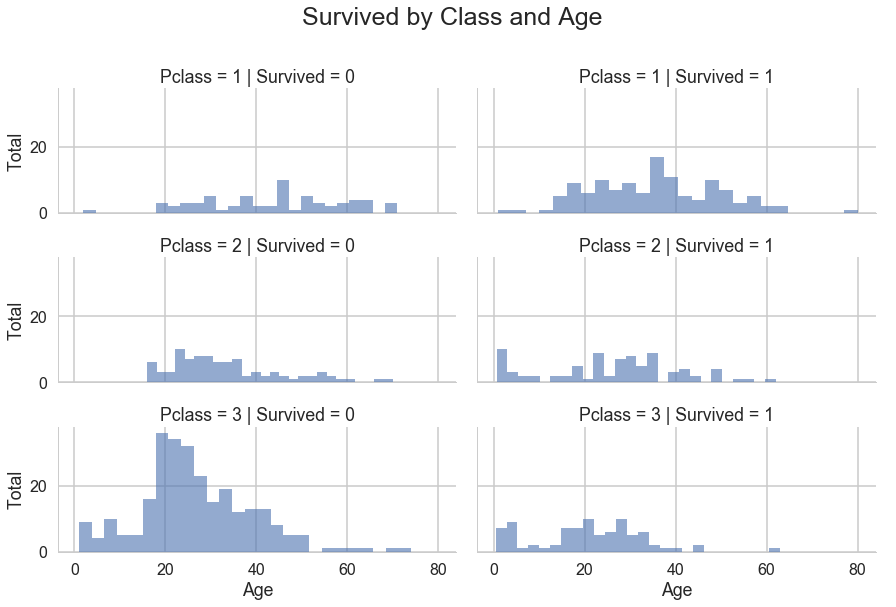

In [49]:
sns.set_context('poster')
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.9, aspect=2.1)
g.map(plt.hist, 'Age', alpha=.6, bins=26)
g.add_legend();
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Survived by Class and Age',fontsize=25)
g.axes[0,0].set_ylabel('Total')
g.axes[1,0].set_ylabel('Total')
g.axes[2,0].set_ylabel('Total')

                         ###### ΕΛΕΓΧΟΣ ΕΠΙΒΙΩΣΗΣ ΜΕ ΒΑΣΗ ΤΗΝ ΚΛΑΣΗ ΚΑΙ ΤΟ ΦΥΛΛΟ #####

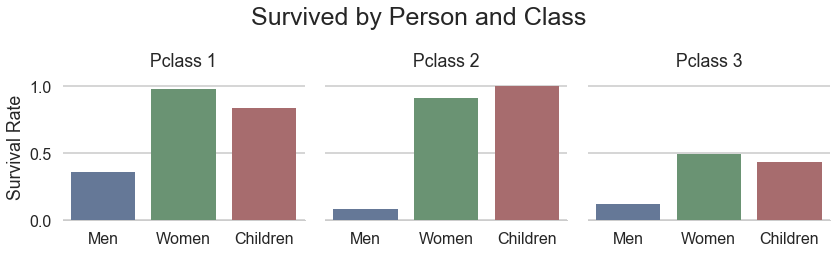

In [51]:
sns.set_context(font_scale=2.5)
g = sns.factorplot(x="Person", y="Survived", col="Pclass",data=train_df, saturation=.5, kind="bar", ci=None, aspect=1)
g.fig.suptitle('Survived by Person and Class',fontsize=25)
plt.subplots_adjust(top=0.75)
(g.set_axis_labels("", "Survival Rate")
.set_xticklabels(["Men", "Women", "Children"])
.set_titles(" {col_var} {col_name} ")
.set(ylim=(0, 1.1))
.despine(left=True)) 

                   #### ΕΛΕΓΧΟΣ ΤΟΥ DATASET ΓΙΑ ΤΥΧΟΝ ΚΑΤΑΧΩΡΗΣΕΙΣ ΠΟΥ ΛΕΙΠΟΥΝ ######

In [53]:
print(train_df.isnull().sum())
print('-'*50)
print('Συνολικά λείπουν: ',train_df.isnull().sum().sum(),' καταχωρήσεις')
print('-'*50)

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Person           0
dtype: int64
--------------------------------------------------
Συνολικά λείπουν:  866  καταχωρήσεις
--------------------------------------------------


                    ####### ΑΝΑΠΑΡΑΣΤΑΣΗ ΤΩΝ ΣΤΟΙΧΕΙΩΝ ΠΟΥ ΛΕΙΠΟΥΝ ΜΕ ΔΙΑΓΡΑΜΜΑ #######

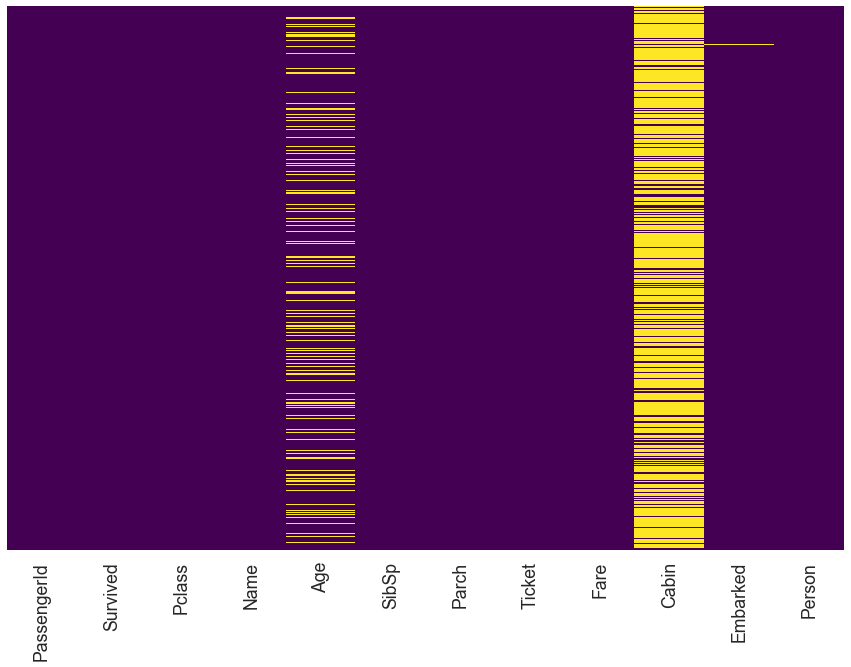

In [54]:
sns.set_context('poster',font_scale=1.1)
plt.figure(figsize=(15,10))
sns.set_context(font_scale=1.3)
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False, cmap='viridis')
#plt.savefig('MissingData.png')

    Λείπουν 177 καταχωρήσεις στην κατηγορία της ηλικίας, 687 καταχωρήσεις στην κατηγοράις της καμπίνας και μόλις 2 καταχωρήσεις στην κατηγορία του λιμανιού επιβίβασης. 
    Θα καλύψουμε τα κενά αυτά, ψάχνοντας την μέση ηλικία ανδρών-γυναικών-παιδιών ξεχωριστά και με τα νούμερα που θα βρούμε, θα γεμίσουμε τα κενά αυτά.

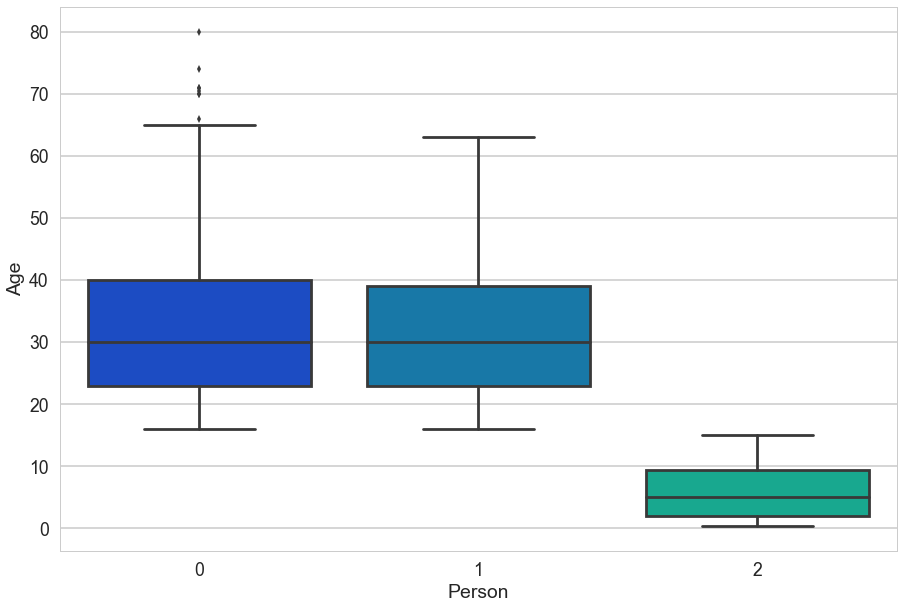

In [55]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Person',y='Age',data=train_df,palette='winter')

In [58]:
print("Ο μέσος όρος ηλικίας των παιδιών ήταν: ",train_df.loc[train_df['Person'] == 2, 'Age'].mean())
print("Ο μέσος όρος ηλικίας των ανδρών ήταν: ",train_df.loc[train_df['Person'] == 0, 'Age'].mean())
print("Ο μέσος όρος ηλικίας των γυναικών ήταν: ", train_df.loc[train_df['Person'] == 1 , 'Age'].mean())

Ο μέσος όρος ηλικίας των παιδιών ήταν:  6.369518072289157
Ο μέσος όρος ηλικίας των ανδρών ήταν:  33.17312348668281
Ο μέσος όρος ηλικίας των γυναικών ήταν:  32.0


Έχοντας γνώση του μέσου όρου ηλικίας ανδρών, γυναικών και παιδιών, θα δημιουργήσουμε συνάρτηση έτσι ώστε να συμπληρώσουμε όλα τα κενά. Όλα τα κενά παιδιά των παιδιών θα λάβουν την ηλικία των 6, των ανδρών 33 και των γυναικών 32.

In [59]:
def age(cols):
    Age = cols[0]
    Person = cols[1]
    
    if pd.isnull(Age):

        if Person == "child":
            return 6

        elif Person == "male":
            return 33

        else:
            return 32

    else:
        return Age

In [60]:
for dataset in combine:
    dataset['Age'] = dataset[['Age','Person']].apply(age,axis=1)

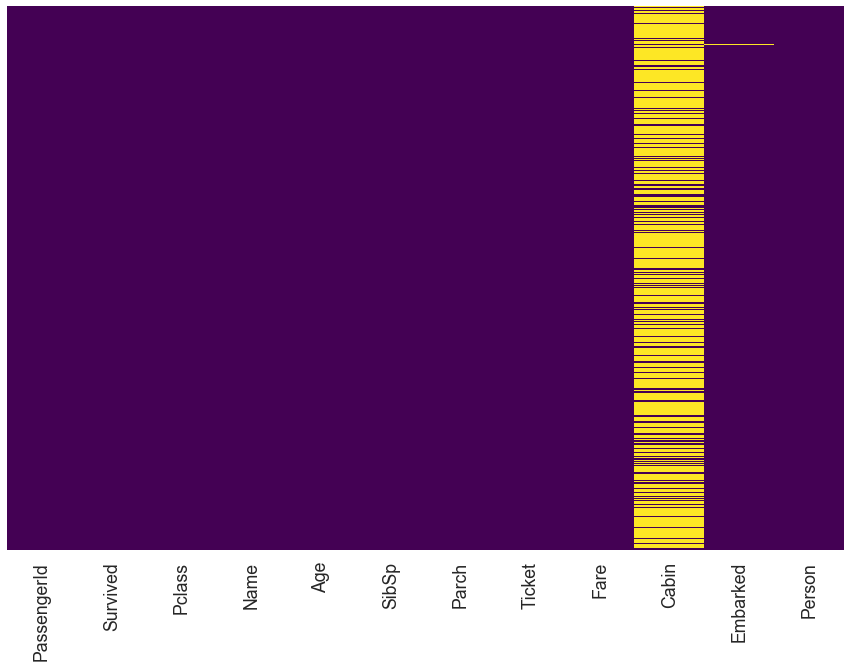

In [62]:
sns.set_context('poster',font_scale=1.1)
plt.figure(figsize=(15,10))
sns.set_context(font_scale=1.3)
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False, cmap='viridis')
#plt.savefig('MissingData.png')

    Η στήλη cabin έχει πάρα πολλά κενά και δεν έχει κάποια ιδιαίτερη αξία για εμάς. Οπότε, θα την σβήσουμε εντελώς. Επίσης θα γεμίσουμε τα δύο κενά του Embarked, βάζοντας την τιμή που εμφανίζεται συχνότερα στην στήλη αυτή.

In [75]:
for dataset in combine:
    dataset.drop('Cabin',axis=1,inplace=True)

ValueError: labels ['Cabin'] not contained in axis

In [73]:
for dataset in combine:
    dataset.Embarked.fillna(value=(dataset.Embarked.value_counts().idxmax()), inplace=True)

In [74]:
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Person         0
dtype: int64


                                ##### MACHINE LEARNING SECTION #########

                            ##### ΜΕΤΑΤΡΟΠΗ ΤΩΝ MALE, FEMALE, CHILD ΣΕ 0,1,2 ######

In [52]:
#train_df['Person']=pd.factorize(train_df['Person'])[0]
for dataset in combine:
    dataset['Person'] = dataset['Person'].map( {'female': 1, 'male': 0, 'child':2 } ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",22.00,1,0,A/5 21171,7.25,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00,1,0,PC 17599,71.28,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00,1,0,113803,53.10,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",35.00,0,0,373450,8.05,NaN,S,0


              ΔΙΑΓΡΑΦΟΥΜΕ ΕΝΤΕΛΩΣ ΤΗΝ ΣΤΗΛΗ TICKET & NAME ΚΑΘΩΣ ΔΕΝ ΥΠΑΧΕΙ ΕΥΚΟΛΟΣ ΤΡΟΠΟΣ ΕΚΜΕΤΑΛΛΕΥΣΗΣ

In [76]:
for dataset in combine:
    dataset.drop('Ticket',axis=1,inplace=True)
    dataset.drop('Name',axis=1,inplace=True)

In [77]:
train_df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Person
0,1,0,3,22.00,1,0,7.25,S,0
1,2,1,1,38.00,1,0,71.28,C,1


                        ##### ΜΕΤΑΤΡΟΠΗ ΤΩΝ S, C, Q ΣΕ 0,1,2 ######

In [78]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q':2 } ).astype(int)

In [79]:
train_df.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Person
0,1,0,3,22.00,1,0,7.25,0,0
1,2,1,1,38.00,1,0,71.28,1,1


                      ###### AGE BANDS ######

In [81]:
train_df['AgeBand'] = pd.cut(train_df['Age'], [0,15,30,45,60,75,90])
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0, 15]",0.59
1,"(15, 30]",0.36
2,"(30, 45]",0.36
3,"(45, 60]",0.41
4,"(60, 75]",0.19
5,"(75, 90]",1.00
